In [140]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np
import re

In [142]:
#Load the data (long format)
file_path = r'C:\Users\xbarc\Downloads\Capstone project\Excel projects\Billionaires\Top 100 Billionaires Dataset.csv'  
df = pd.read_csv(file_path)

In [144]:
#Display the first few rows of the data
print(df.head())

   Rank                      Name Birth Date  Age Gender Self made/Inherited  \
0     1                 Elon Musk  6/28/1971   53   Male           Self made   
1     2                Jeff Bezos  1/12/1964   60   Male           Self made   
2     3  Bernard Arnault & family   3/5/1949   75   Male           Self made   
3     4           Mark Zuckerberg  5/14/1984   40   Male           Self made   
4     5             Larry Ellison  8/17/1944   80   Male           Self made   

   2019 Wealth  2019 Rank  2020 Wealth  2020 Rank  ...  2024 Wealth  \
0         22.3         32         24.6         28  ...        239.0   
1        131.0          1        113.0          1  ...        189.8   
2         76.0          4         76.0          3  ...        189.2   
3         62.3          8         54.7          7  ...        179.0   
4         62.5          7         59.0          5  ...        170.7   

           Industry        Company      Continent        Country  \
0        Automotive  Tes

In [146]:
df.shape

(100, 26)

In [148]:
df.dtypes

Rank                          int64
Name                         object
Birth Date                   object
Age                           int64
Gender                       object
Self made/Inherited          object
2019 Wealth                 float64
2019 Rank                     int64
2020 Wealth                 float64
2020 Rank                     int64
2021 Wealth                 float64
2021 Rank                     int64
2022 Wealth                 float64
2022 Rank                     int64
2023 Wealth                 float64
2023 Rank                    object
2024 Wealth                 float64
Industry                     object
Company                      object
Continent                    object
Country                      object
Yearly Median Salary          int64
Monthly Median Salary         int64
Life Expectancy               int64
GDP (In trillions of $)     float64
Population (In Millions)    float64
dtype: object

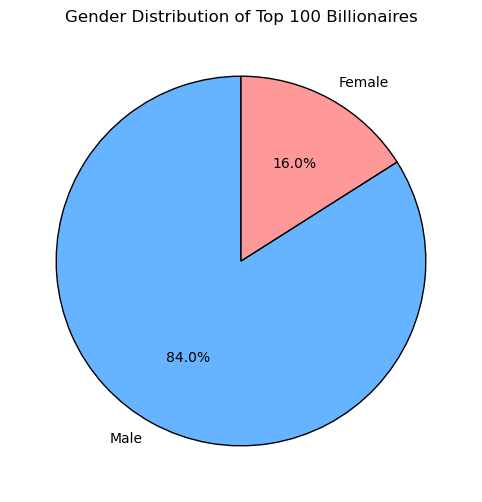

In [150]:
#Count the number of occurrences of each gender
gender_counts = df['Gender'].value_counts()

#Define colors for better visualization
colors = ['#66b3ff', '#ff9999']

#Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

#Add a title
plt.title("Gender Distribution of Top 100 Billionaires")

#Display the chart
plt.show()

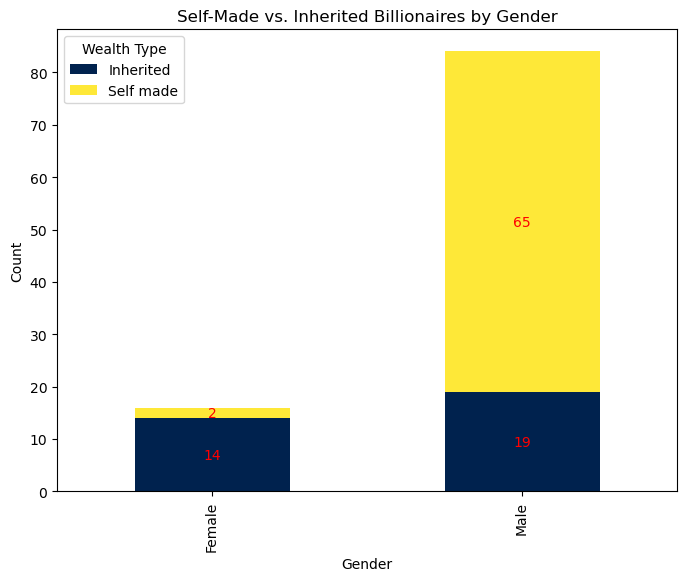

In [152]:
#Group and count 'Self made/Inherited' by 'Gender'
gender_wealth_counts = df.groupby(['Gender', 'Self made/Inherited']).size().unstack()

#Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = gender_wealth_counts.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="cividis", ax=ax)

#Add value labels on the bars
for bar in bars.containers:
    ax.bar_label(bar, label_type="center", fmt="%d", fontsize=10, color="red")

#Customize labels
plt.title("Self-Made vs. Inherited Billionaires by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Wealth Type")

#Show the plot
plt.show()


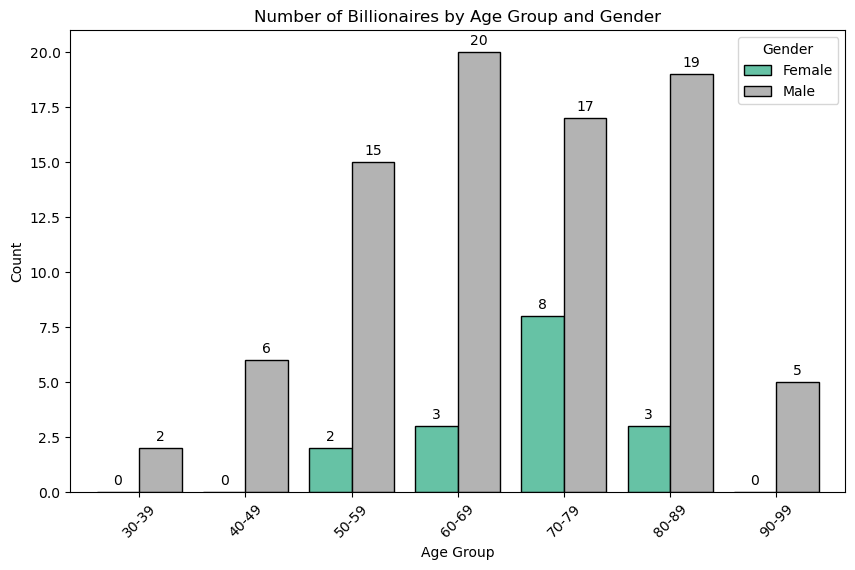

In [154]:
#Define age bins (30-39, 40-49, ..., 90-100)
age_bins = list(range(30, 101, 10))  # [30, 40, 50, ..., 100]
age_labels = [f"{i}-{i+9}" for i in age_bins[:-1]]  # ['30-39', '40-49', ..., '90-100']

#Create an 'Age Group' column
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)

#Group by Age Group and Gender (Fixing Pandas warning by setting observed=False)
age_gender_counts = df.groupby(['Age Group', 'Gender'], observed=False).size().unstack()

#Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = age_gender_counts.plot(kind='bar', width=0.8, ax=ax, colormap="Set2", edgecolor="black")

#Add value labels on bars
for container in bars.containers:
    bars.bar_label(container, label_type="edge", fmt="%d", fontsize=10, padding=3)

#Customize labels
plt.title("Number of Billionaires by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.xticks(rotation=45)  

#Show the plot
plt.show()


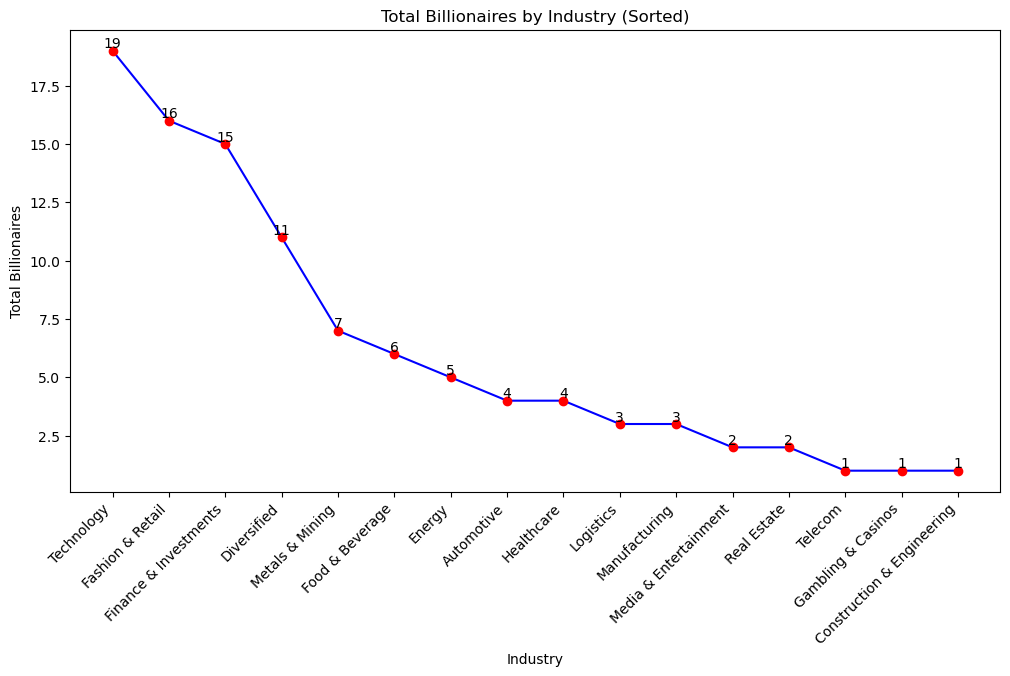

In [156]:
#Count the number of billionaires per industry
industry_counts = df['Industry'].value_counts().reset_index()
industry_counts.columns = ['Industry', 'Total Billionaires']

#Sort industries by the highest number of billionaires
industry_counts = industry_counts.sort_values(by='Total Billionaires', ascending=False)

#Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=industry_counts['Industry'], 
    y=industry_counts['Total Billionaires'], 
    linestyle='-', color='blue'  
)

#Add red markers on each data point
plt.scatter(
    x=industry_counts['Industry'], 
    y=industry_counts['Total Billionaires'], 
    color='red', 
    zorder=3
)

#Add value labels on each point
for i, txt in enumerate(industry_counts['Total Billionaires']):
    plt.text(i, txt, str(txt), ha='center', va='bottom', fontsize=10, color='black')

#Customize labels
plt.title("Total Billionaires by Industry (Sorted)")
plt.xlabel("Industry")
plt.ylabel("Total Billionaires")
plt.xticks(rotation=45, ha="right") 

#Show plot
plt.show()

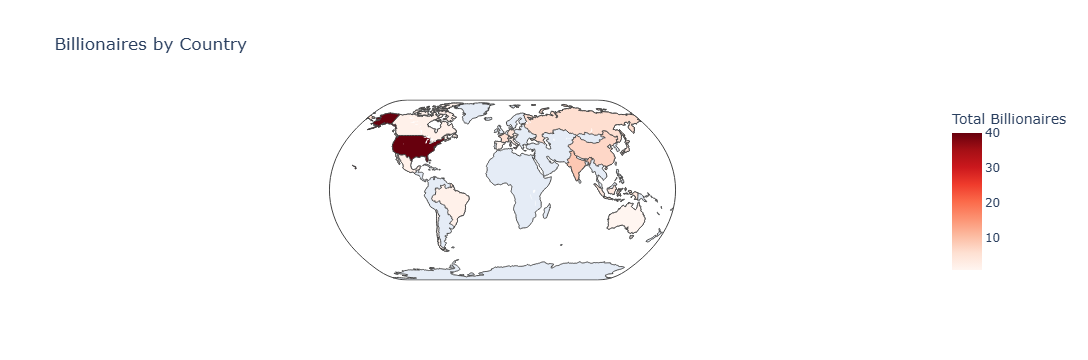

In [158]:
#Count billionaires per country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Total Billionaires']

#Create a choropleth map
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode="country names",
    color="Total Billionaires",
    hover_name="Country",
    color_continuous_scale="reds", 
    title="Billionaires by Country"
)

#Customize layout
fig.update_layout(
    geo=dict(showcoastlines=True, projection_type="natural earth"),
    coloraxis_colorbar=dict(title="Total Billionaires")
)

#Show the interactive map
fig.show()

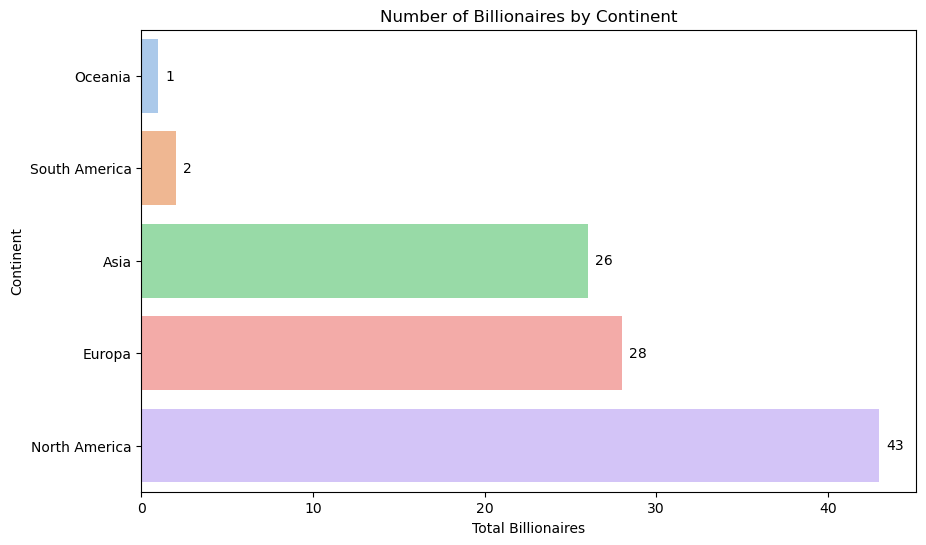

In [160]:
#Count billionaires per continent
continent_counts = df['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Total Billionaires']

#Sort by highest number of billionaires
continent_counts = continent_counts.sort_values(by='Total Billionaires', ascending=True)  

#Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x="Total Billionaires", 
    y="Continent", 
    data=continent_counts, 
    hue="Continent",  
    palette="pastel",  
    legend=False  
)

#Add value labels on bars
for bar in bars.containers:
    bars.bar_label(bar, fmt='%d', fontsize=10, padding=5)

#Customize labels
plt.title("Number of Billionaires by Continent")
plt.xlabel("Total Billionaires")
plt.ylabel("Continent")

#Show the plot
plt.show()

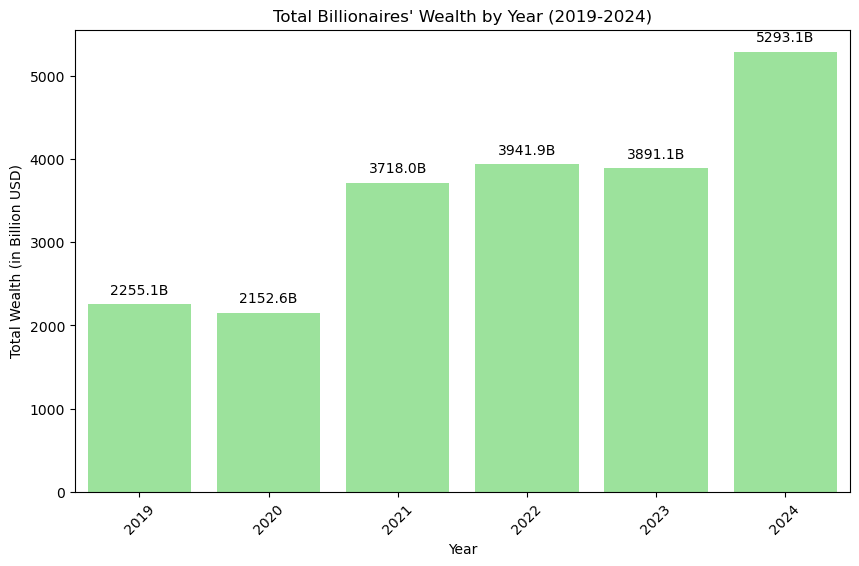

In [162]:
#Select wealth columns (2019–2024)
wealth_columns = ['2019 Wealth', '2020 Wealth', '2021 Wealth', '2022 Wealth', '2023 Wealth', '2024 Wealth']

#Compute total wealth per year
total_wealth_per_year = df[wealth_columns].sum()

#Convert to DataFrame for plotting
total_wealth_df = total_wealth_per_year.reset_index()
total_wealth_df.columns = ['Year', 'Total Wealth']

#Extract numeric year safely
total_wealth_df['Year'] = total_wealth_df['Year'].apply(lambda x: re.findall(r'\d+', x)[0]).astype(int)

#Define a custom color palette (darker max, lighter min)
color = ["lightgreen" for year in total_wealth_df['Year']]

#Create a bar chart with improved colors
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x="Year", 
    y="Total Wealth", 
    data=total_wealth_df,
    hue="Total Wealth",
    palette=color,
    legend=False,  
)

#Add value labels on bars (showing total wealth per year)
for bar in bars.containers:
    bars.bar_label(bar, fmt='%.1fB', fontsize=10, padding=5)

#Customize labels
plt.title("Total Billionaires' Wealth by Year (2019-2024)")
plt.xlabel("Year")
plt.ylabel("Total Wealth (in Billion USD)")
plt.xticks(rotation=45)

#Show the plot
plt.show()

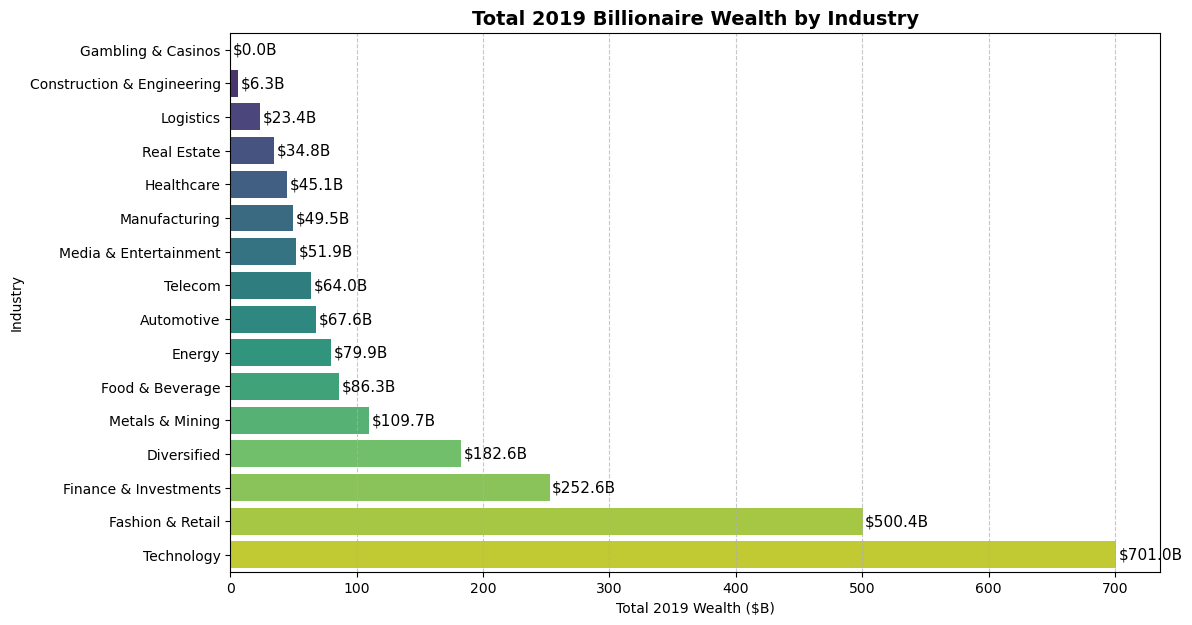

In [164]:
# Ensure '2019 Wealth' is numeric and handle missing values
df['2019 Wealth'] = pd.to_numeric(df['2019 Wealth'], errors='coerce')  
df = df.dropna(subset=['2019 Wealth'])  

# Aggregate total 2019 wealth by industry
industry_wealth = df.groupby("Industry")["2019 Wealth"].sum().sort_values(ascending=True).reset_index()

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=industry_wealth, x="2019 Wealth", y="Industry", hue="Industry", palette="viridis", legend=False)

# Add data labels
for bar in ax.patches:
    plt.text(bar.get_width() + 2,  
             bar.get_y() + bar.get_height() / 2, 
             f'${bar.get_width():,.1f}B', 
             ha='left', va='center', fontsize=11, color='black')

# Formatting
plt.xlabel("Total 2019 Wealth ($B)")
plt.ylabel("Industry")
plt.title("Total 2019 Billionaire Wealth by Industry", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

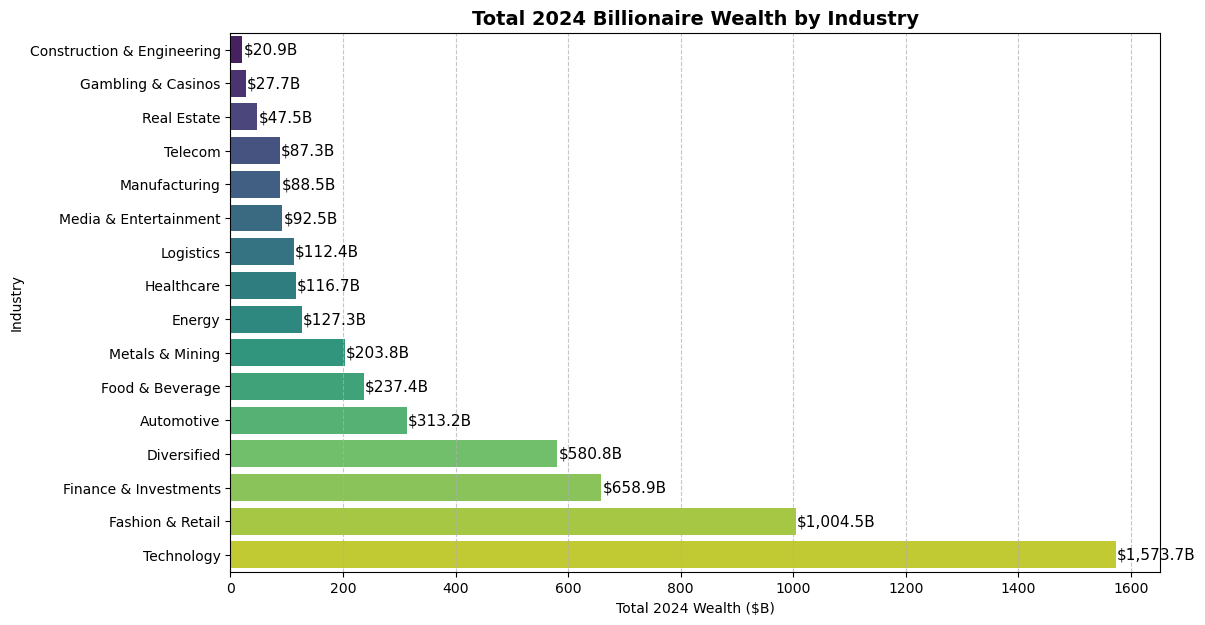

In [166]:
# Ensure '2024 Wealth' is numeric and handle missing values
df['2024 Wealth'] = pd.to_numeric(df['2024 Wealth'], errors='coerce')  
df = df.dropna(subset=['2024 Wealth'])  

# Aggregate total 2024 wealth by industry
industry_wealth = df.groupby("Industry")["2024 Wealth"].sum().sort_values(ascending=True).reset_index()

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=industry_wealth, x="2024 Wealth", y="Industry", hue="Industry", palette="viridis", legend=False)

# Add data labels
for bar in ax.patches:
    plt.text(bar.get_width() + 2,  
             bar.get_y() + bar.get_height() / 2, 
             f'${bar.get_width():,.1f}B', 
             ha='left', va='center', fontsize=11, color='black')

# Formatting
plt.xlabel("Total 2024 Wealth ($B)")
plt.ylabel("Industry")
plt.title("Total 2024 Billionaire Wealth by Industry", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

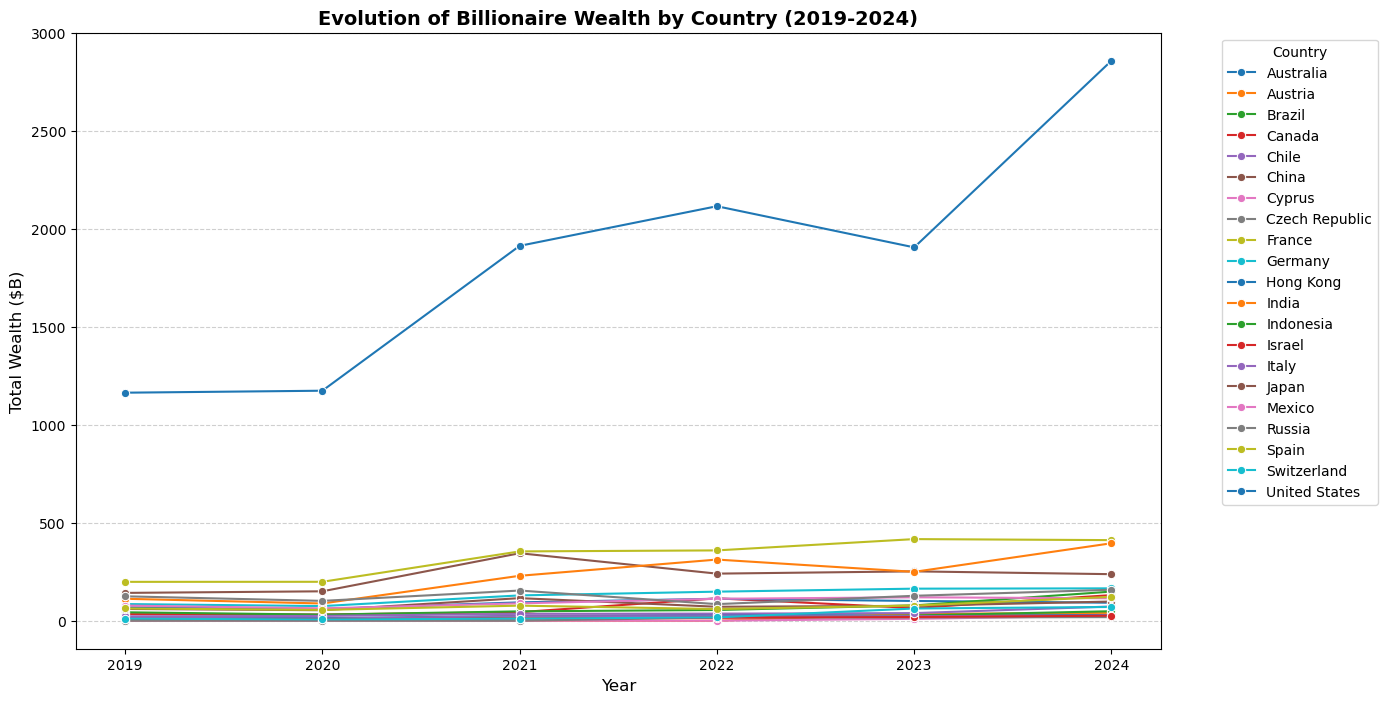

In [168]:
# Convert wealth columns to numeric, handling errors
wealth_cols = ["2019 Wealth", "2020 Wealth", "2021 Wealth", "2022 Wealth", "2023 Wealth", "2024 Wealth"]
df[wealth_cols] = df[wealth_cols].apply(pd.to_numeric, errors="coerce")

# Aggregate total billionaire wealth per country per year
country_wealth = df.groupby("Country")[wealth_cols].sum().reset_index()

# Convert to long format for Seaborn lineplot
country_wealth_long = country_wealth.melt(id_vars="Country", var_name="Year", value_name="Total Wealth")
country_wealth_long["Year"] = country_wealth_long["Year"].str[:4].astype(int)  

# Plot
plt.figure(figsize=(14, 8))
ax = sns.lineplot(data=country_wealth_long, x="Year", y="Total Wealth", hue="Country", marker="o", palette="tab10")

# Formatting
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Wealth ($B)", fontsize=12)
plt.title("Evolution of Billionaire Wealth by Country (2019-2024)", fontsize=14, fontweight="bold")
plt.xticks(range(2019, 2025))  
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")  
plt.show()

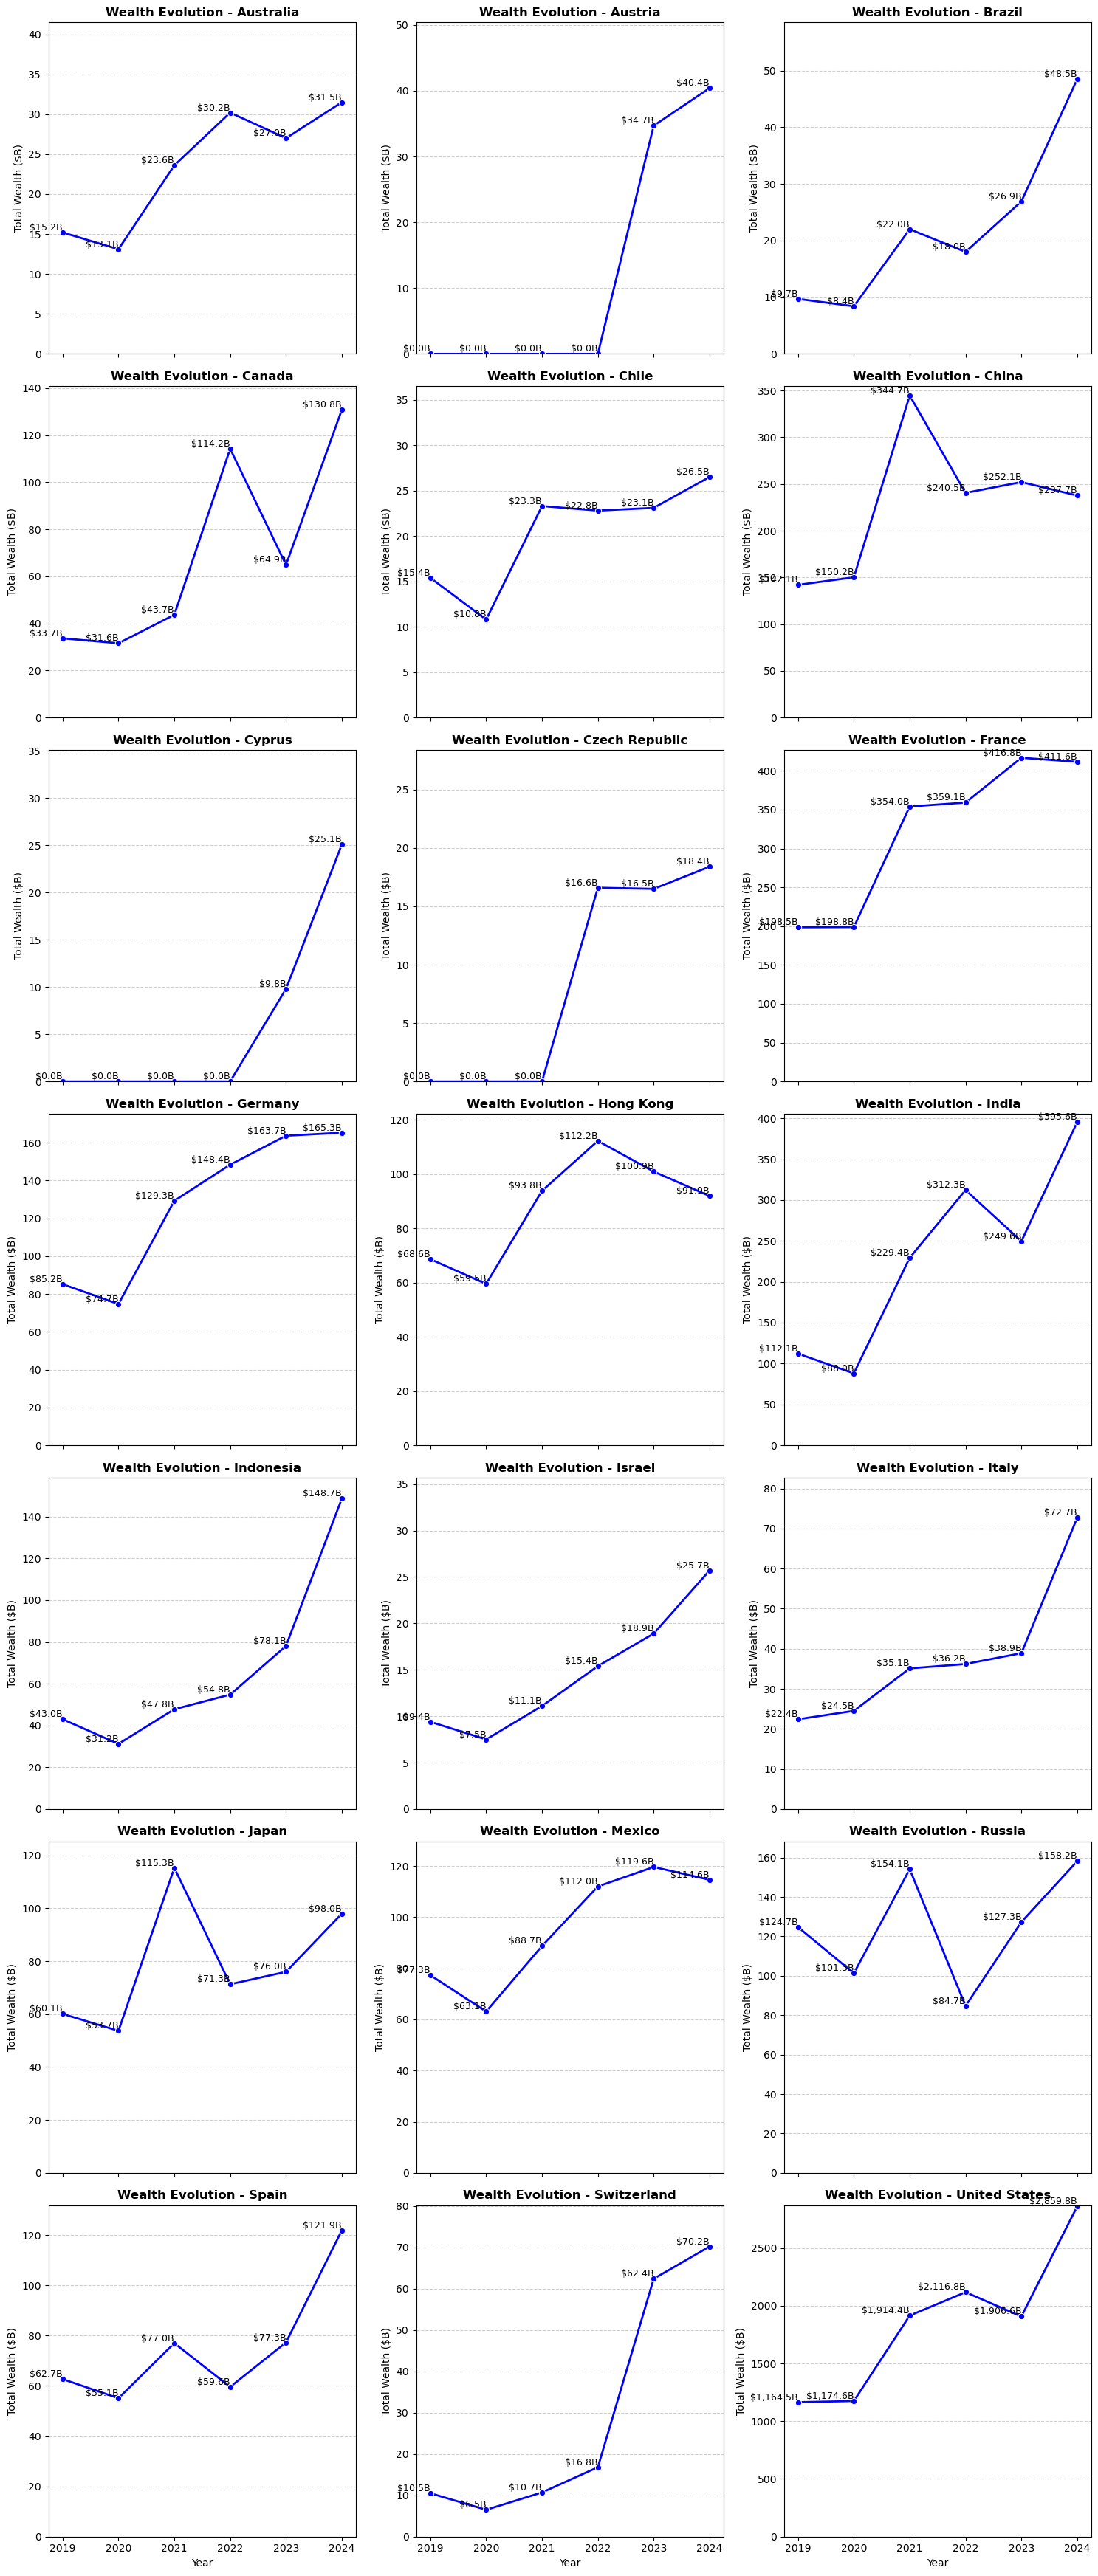

In [170]:
# Convert wealth columns to numeric, handling errors
wealth_cols = ["2019 Wealth", "2020 Wealth", "2021 Wealth", "2022 Wealth", "2023 Wealth", "2024 Wealth"]
df[wealth_cols] = df[wealth_cols].apply(pd.to_numeric, errors="coerce")

# Aggregate total billionaire wealth per country per year
country_wealth = df.groupby("Country")[wealth_cols].sum().reset_index()

# Convert to long format for easier plotting
country_wealth_long = country_wealth.melt(id_vars="Country", var_name="Year", value_name="Total Wealth")
country_wealth_long["Year"] = country_wealth_long["Year"].str[:4].astype(int)  

# Get unique list of countries
countries = country_wealth_long["Country"].unique()
num_countries = len(countries)

# Create subplots (adjusting size dynamically based on the number of countries)
cols = 3  
rows = -(-num_countries // cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharex=True)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each country's wealth trend separately
for i, country in enumerate(countries):
    ax = axes[i]
    country_data = country_wealth_long[country_wealth_long["Country"] == country]
    
    # Set dynamic y-axis limits (max wealth + 10M for better visualization)
    max_wealth = country_data["Total Wealth"].max()
    y_limit = max_wealth + 10  
    
    # Lineplot
    sns.lineplot(data=country_data, x="Year", y="Total Wealth", marker="o", ax=ax, color="b", linewidth=2)
    
    # Add data labels
    for x, y in zip(country_data["Year"], country_data["Total Wealth"]):
        if not pd.isna(y):  # Avoid NaN values
            ax.text(x, y, f"${y:,.1f}B", ha="right", va="bottom", fontsize=9, color="black")
    
    # Formatting
    ax.set_title(f"Wealth Evolution - {country}", fontsize=12, fontweight="bold")
    ax.set_xlabel("Year")
    ax.set_ylabel("Total Wealth ($B)")
    ax.set_ylim(0, y_limit)  # Set the y-axis limit dynamically
    ax.grid(axis="y", linestyle="--", alpha=0.6)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better readability
plt.tight_layout()
plt.show()

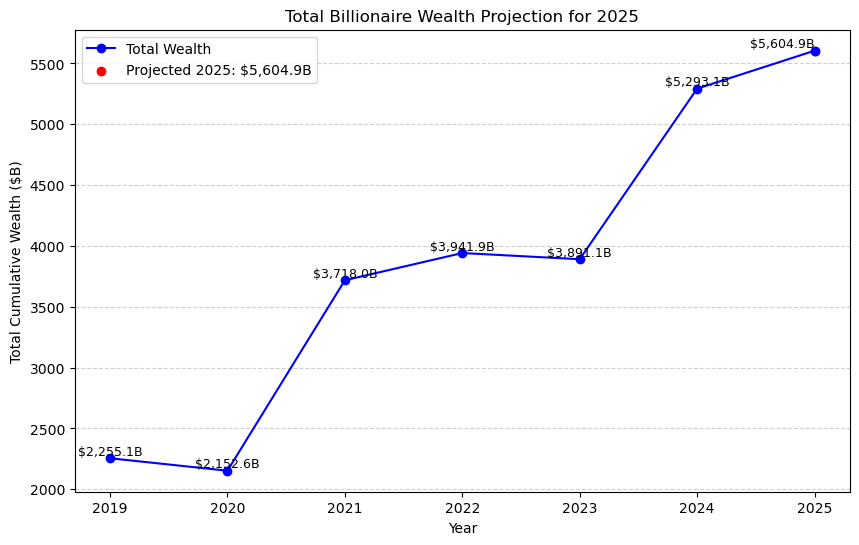

In [172]:
# Aggregate total billionaire wealth per year
total_wealth = df[wealth_cols].sum().reset_index()
total_wealth.columns = ["Year", "Total Wealth"]

# Convert "2019 Wealth" → 2019 for plotting
total_wealth["Year"] = total_wealth["Year"].str[:4].astype(int)

# Prepare data for Linear Regression
X = total_wealth["Year"].values.reshape(-1, 1)  
y = total_wealth["Total Wealth"].values  

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict wealth for 2025
year_2025 = np.array([[2025]])
predicted_wealth_2025 = model.predict(year_2025)[0]

# Extend data for visualization
years_extended = np.append(X, [[2025]])
wealth_extended = np.append(y, predicted_wealth_2025)

# Plot the historical data and prediction
plt.figure(figsize=(10, 6))
plt.plot(years_extended, wealth_extended, marker="o", linestyle="-", color="b", label="Total Wealth")
plt.scatter(2025, predicted_wealth_2025, color="r", label=f"Projected 2025: ${predicted_wealth_2025:,.1f}B")

# Add value labels
for x, y in zip(years_extended, wealth_extended):
    plt.text(x, y, f"${y:,.1f}B", ha="right" if x == 2025 else "center", va="bottom", fontsize=9, color="black")

# Formatting
plt.xlabel("Year")
plt.ylabel("Total Cumulative Wealth ($B)")
plt.title("Total Billionaire Wealth Projection for 2025")
plt.xticks(np.arange(2019, 2026, 1))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

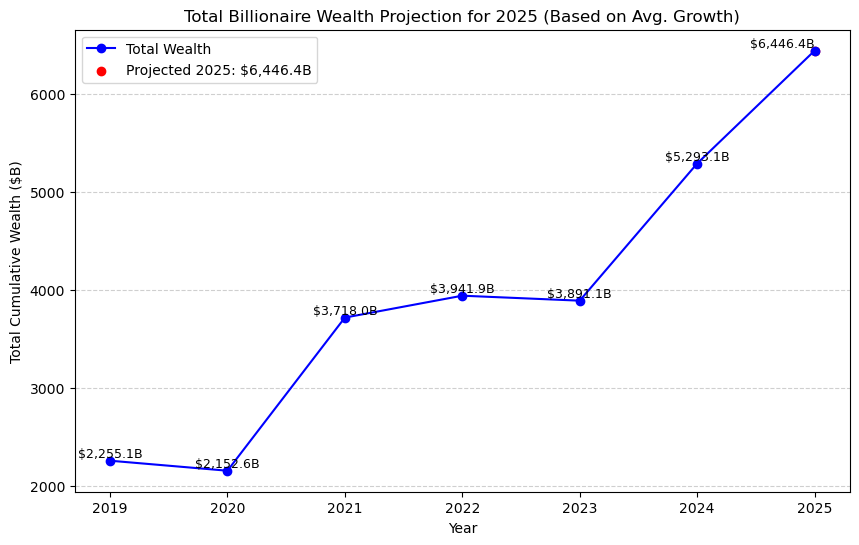

In [174]:
# Calculate total wealth per year
total_wealth = df[wealth_cols].sum().reset_index()
total_wealth.columns = ["Year", "Total Wealth"]

# Convert "2019 Wealth" → 2019 for plotting
total_wealth["Year"] = total_wealth["Year"].str[:4].astype(int)

# Calculate Year-over-Year (YoY) growth rates
total_wealth["YoY Growth (%)"] = total_wealth["Total Wealth"].pct_change() * 100

# Compute the average growth rate from 2019-2024
avg_growth_rate = total_wealth["YoY Growth (%)"].mean(skipna=True) / 100  

# Estimate 2025 Wealth using the average growth rate
wealth_2024 = total_wealth.loc[total_wealth["Year"] == 2024, "Total Wealth"].values[0]
predicted_wealth_2025 = wealth_2024 * (1 + avg_growth_rate)

# Append the 2025 estimate
total_wealth = pd.concat([
    total_wealth,
    pd.DataFrame({"Year": [2025], "Total Wealth": [predicted_wealth_2025], "YoY Growth (%)": [avg_growth_rate * 100]})
], ignore_index=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(total_wealth["Year"], total_wealth["Total Wealth"], marker="o", linestyle="-", color="b", label="Total Wealth")
plt.scatter(2025, predicted_wealth_2025, color="r", label=f"Projected 2025: ${predicted_wealth_2025:,.1f}B")

# Add value labels
for x, y in zip(total_wealth["Year"], total_wealth["Total Wealth"]):
    plt.text(x, y, f"${y:,.1f}B", ha="right" if x == 2025 else "center", va="bottom", fontsize=9, color="black")

# Formatting
plt.xlabel("Year")
plt.ylabel("Total Cumulative Wealth ($B)")
plt.title("Total Billionaire Wealth Projection for 2025 (Based on Avg. Growth)")
plt.xticks(np.arange(2019, 2026, 1))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

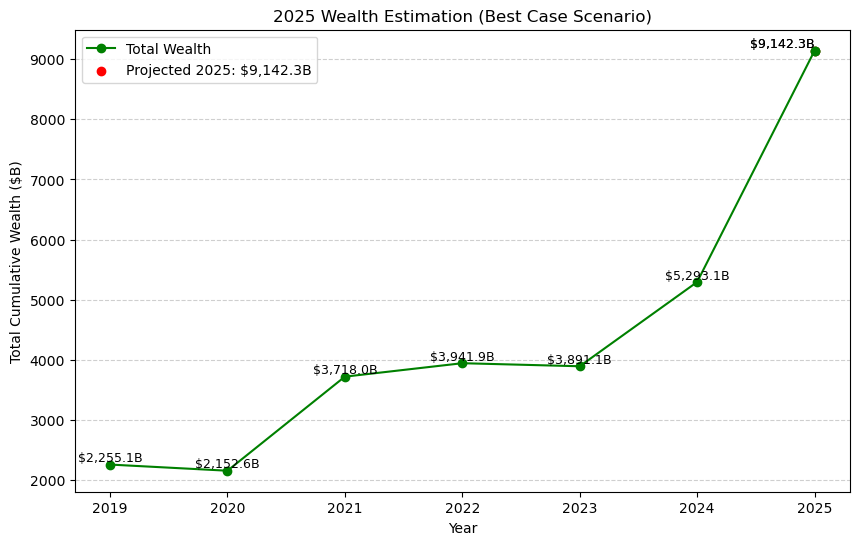

In [176]:
# Calculate total wealth per year
total_wealth = df[wealth_cols].sum().reset_index()
total_wealth.columns = ["Year", "Total Wealth"]

# Convert column names (e.g., "2019 Wealth" → 2019)
total_wealth["Year"] = total_wealth["Year"].str[:4].astype(int)

# Compute Year-over-Year (YoY) Growth Rates
total_wealth["YoY Growth (%)"] = total_wealth["Total Wealth"].pct_change() * 100

# Identify the highest YoY growth rate from 2019-2024
max_growth_rate = total_wealth["YoY Growth (%)"].max(skipna=True) / 100  

# Estimate 2025 Wealth using the highest YoY growth rate
wealth_2024 = total_wealth.loc[total_wealth["Year"] == 2024, "Total Wealth"].values[0]
predicted_wealth_2025 = wealth_2024 * (1 + max_growth_rate)

# Append the 2025 estimate
total_wealth = pd.concat([
    total_wealth,
    pd.DataFrame({"Year": [2025], "Total Wealth": [predicted_wealth_2025], "YoY Growth (%)": [max_growth_rate * 100]})
], ignore_index=True)

# Append the 2025 estimate
total_wealth = pd.concat([
    total_wealth,
    pd.DataFrame({"Year": [2025], "Total Wealth": [predicted_wealth_2025], "YoY Growth (%)": [min_growth_rate * 100]})
], ignore_index=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(total_wealth["Year"], total_wealth["Total Wealth"], marker="o", linestyle="-", color="g", label="Total Wealth")
plt.scatter(2025, predicted_wealth_2025, color="r", label=f"Projected 2025: ${predicted_wealth_2025:,.1f}B")

# Add value labels
for x, y in zip(total_wealth["Year"], total_wealth["Total Wealth"]):
    plt.text(x, y, f"${y:,.1f}B", ha="right" if x == 2025 else "center", va="bottom", fontsize=9, color="black")

# Formatting
plt.xlabel("Year")
plt.ylabel("Total Cumulative Wealth ($B)")
plt.title("2025 Wealth Estimation (Best Case Scenario)")
plt.xticks(np.arange(2019, 2026, 1))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.show()

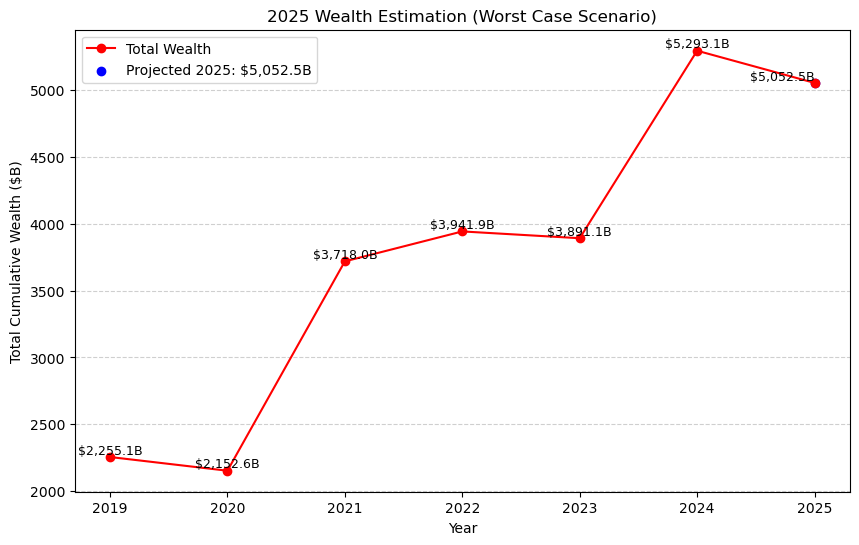

In [178]:
# Calculate total wealth per year
total_wealth = df[wealth_cols].sum().reset_index()
total_wealth.columns = ["Year", "Total Wealth"]

# Convert column names (e.g., "2019 Wealth" → 2019)
total_wealth["Year"] = total_wealth["Year"].str[:4].astype(int)

# Compute Year-over-Year (YoY) Growth Rates
total_wealth["YoY Growth (%)"] = total_wealth["Total Wealth"].pct_change() * 100

# Identify the lowest YoY growth rate from 2019-2024
min_growth_rate = total_wealth["YoY Growth (%)"].min(skipna=True) / 100  

# Estimate 2025 Wealth using the lowest YoY growth rate
wealth_2024 = total_wealth.loc[total_wealth["Year"] == 2024, "Total Wealth"].values[0]
predicted_wealth_2025 = wealth_2024 * (1 + min_growth_rate)

# Append the 2025 estimate
total_wealth = pd.concat([
    total_wealth,
    pd.DataFrame({"Year": [2025], "Total Wealth": [predicted_wealth_2025], "YoY Growth (%)": [min_growth_rate * 100]})
], ignore_index=True)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(total_wealth["Year"], total_wealth["Total Wealth"], marker="o", linestyle="-", color="r", label="Total Wealth")
plt.scatter(2025, predicted_wealth_2025, color="b", label=f"Projected 2025: ${predicted_wealth_2025:,.1f}B")

# Add value labels
for x, y in zip(total_wealth["Year"], total_wealth["Total Wealth"]):
    plt.text(x, y, f"${y:,.1f}B", ha="right" if x == 2025 else "center", va="bottom", fontsize=9, color="black")

# Formatting
plt.xlabel("Year")
plt.ylabel("Total Cumulative Wealth ($B)")
plt.title("2025 Wealth Estimation (Worst Case Scenario)")
plt.xticks(np.arange(2019, 2026, 1))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend()
plt.show()